In [1]:
# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# seaborn
import seaborn as sns

# pandas
import pandas as pd

# other stuff
import numpy as np
import random
import math
import sys
import os
import pickle
import scipy

import theano
import theano.tensor as T

# for more sophisticated display
from IPython.display import display, Math, Latex, HTML, clear_output

%load_ext autoreload
%autoreload 2

In [2]:
def zipf_mandel(s, q, k):
    p = 1 / (k + q) ** s
    return p / sum(p)

def dirichlet_var(counts):
    s = sum(counts)
    return counts * (s - counts) / (s ** 2 * (s + 1))

def obj_zipf(x, k, freq, counts):
    errors = (zipf_mandel(x[0], 0, k) - freq) ** 2
    return sum(errors / dirichlet_var(counts)) / len(counts)

def obj_zipf_mandel(x, k, freq, counts):
    errors = (zipf_mandel(x[0], x[1], k) - freq) ** 2
    return sum(errors / dirichlet_var(counts)) / len(counts)
    
def callback(x):
    pass
#     print(x)

-------------------------------
reading data 2x2
computing frequencies
fitting model
plotting results
-------------------------------
reading data 2x3
computing frequencies
fitting model
plotting results
-------------------------------
reading data 3x2
computing frequencies
fitting model
plotting results
-------------------------------
reading data 2x4
computing frequencies
fitting model
plotting results


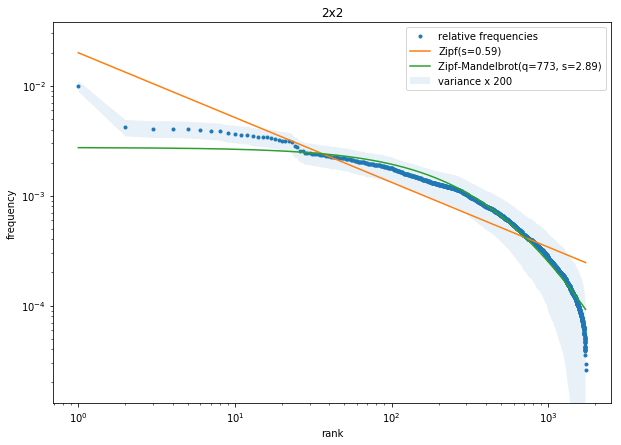

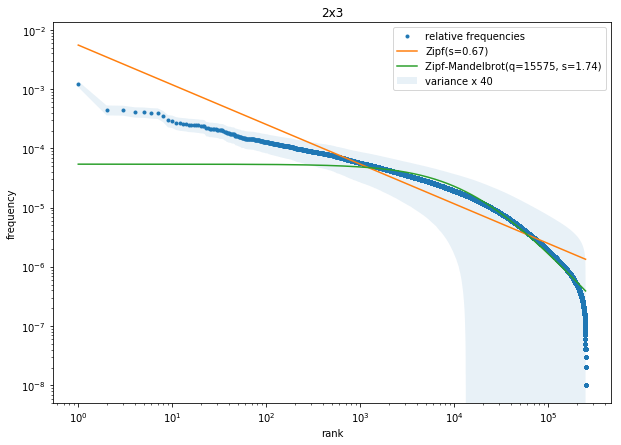

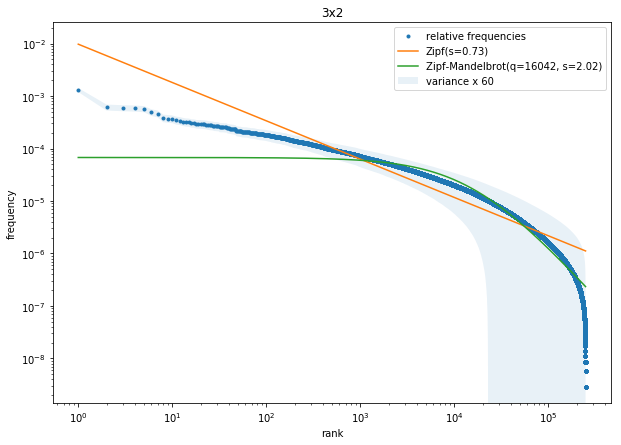

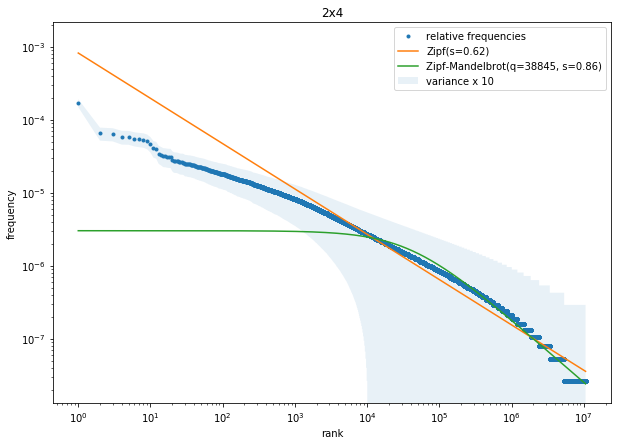

In [3]:
for file, s_ZM, q_ZM, s_Z, var_factor in [
    ('2x2', 2.89,   773, 0.59, 200),
    ('2x3', 1.74, 15575, 0.67, 40),
    ('3x2', 2.02, 16042, 0.73, 60),
    ('2x4', 0.86, 38845, 0.62, 10),
]:
    print('-------------------------------')
    print("reading data {}".format(file))
    data = pd.read_csv('./' + file + 'freqs.txt', names=['counts'])
    print("computing frequencies")
    data['freq'] = data['counts'] / data['counts'].sum()

    print("fitting model")
    k = np.array(range(1, len(data) + 1))
    # optimize
#     s_Z, = scipy.optimize.minimize(fun=obj_zipf,
#                                   x0=[s_Z],
#                                   args=(k,
#                                         data['freq'],
#                                         data['counts'],
#                                        ),
#                                   method='Nelder-Mead',
#                                   callback=callback,
#                                   options={'disp': True}
#                                  )['x']
#     s_ZM, q_ZM = scipy.optimize.minimize(fun=obj_zipf_mandel,
#                                          x0=[s_ZM, q_ZM],
#                                          args=(k,
#                                                data['freq'],
#                                                data['counts'],
#                                               ),
#                                          method='Nelder-Mead',
#                                          callback=callback,
#                                          options={'disp': True}
#                                         )['x']

    print("plotting results")
    # plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.fill_between(k,
                    data['freq'] - np.sqrt(dirichlet_var(data['counts'])) * var_factor,
                    data['freq'] + np.sqrt(dirichlet_var(data['counts'])) * var_factor,
                    alpha=0.1,
                    label='variance x {}'.format(var_factor)
                   )
    ax.plot(k, data['freq'], '.',
            label='relative frequencies')
    ax.plot(k, zipf_mandel(s_Z, 0, k),
            label='Zipf(s={})'.format(np.round(s_Z, 2)))
    ax.plot(k, zipf_mandel(s_ZM, q_ZM, k),
            label='Zipf-Mandelbrot(q={}, s={})'.format(int(round(q_ZM)), np.round(s_ZM, 2)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('rank')
    ax.set_ylabel('frequency')
    ax.set_ylim(min(data['freq'])/2, None)
    ax.set_title(file)
    ax.legend()
    fig.savefig(file+'.pdf')
    fig.savefig(file+'.png')